# Discrete Cosine Transformation

Applications for the DCF.

In [1]:
%matplotlib inline

from importlib import reload

import logging
logging.basicConfig(level=logging.WARN,format='%(levelname)s - %(message)s')
logging.getLogger("dct").setLevel(logging.DEBUG)
logging.getLogger("jupyter").setLevel(logging.DEBUG)
logger = logging.getLogger("jupyter")

In [2]:
## Common imports
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
import scipy.fftpack

Define an array of values 0..255 each indicating one gray tone of a pixel.
We then apply the `dct` function from the `scipy` package.

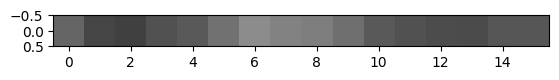

[380.           6.64528564 -65.742693   -19.39431095  46.08752382
  20.49658818  11.23421332   6.20074952   5.5          9.43444586
  11.72472653  10.2403252   -5.01897882  -2.54175555  -0.84944429
   2.19269461]


In [3]:
#data = np.array([10, 20, 50, 200, 180, 150, 100, 50, 10, 75, 95, 105, 135, 180, 210, 240, 255, 230, 200, 100])
data = np.array([101,69,64,82,89,114,140,130,126,111,90,81,76,75,86,86])
plt.imshow(np.expand_dims(data, axis=0), 'gray', vmin=0, vmax=255)
plt.show()

# DCT
dct_Data = scipy.fftpack.dct(data, norm = 'ortho')
print(dct_Data)

[101.  69.  64.  82.  89. 114. 140. 130. 126. 111.  90.  81.  76.  75.
  86.  86.]


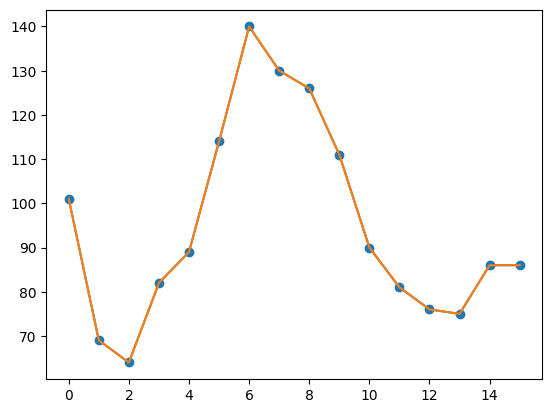

In [4]:
# Inverse DCT
plt.plot(data, '-o')
idct_data = scipy.fftpack.idct(dct_Data, norm = 'ortho')
print(idct_data)
plt.plot(idct_data)
plt.show()

Now test own implementation. Plot a graph for each iteration demonstrating the approximation of the overlay of cosine waves.
We isolate each "cosine hamornic" and visualize the influence on the resulting function:

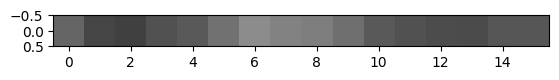

DEBUG - 0:
DEBUG -     X_0 (tmp 0) = 101
DEBUG -     X_0 (tmp 1) = 170
DEBUG -     X_0 (tmp 2) = 234
DEBUG -     X_0 (tmp 3) = 316
DEBUG -     X_0 (tmp 4) = 405
DEBUG -     X_0 (tmp 5) = 519
DEBUG -     X_0 (tmp 6) = 659
DEBUG -     X_0 (tmp 7) = 789
DEBUG -     X_0 (tmp 8) = 915
DEBUG -     X_0 (tmp 9) = 1026
DEBUG -     X_0 (tmp 10) = 1116
DEBUG -     X_0 (tmp 11) = 1197
DEBUG -     X_0 (tmp 12) = 1273
DEBUG -     X_0 (tmp 13) = 1348
DEBUG -     X_0 (tmp 14) = 1434
DEBUG -     X_0 (tmp 15) = 1520
DEBUG -   X_0 = 380.0
DEBUG - 1:
DEBUG -     X_1 (tmp 0) = 100.51365739389189 |   x_i=101, Pi/16=0.19634954084936207, 0+1/2*1=0.5 | cos(0.09817477042468103) = 0.9951847266721969
DEBUG -     X_1 (tmp 1) = 166.5425405594143 |   x_i=69, Pi/16=0.19634954084936207, 1+1/2*1=1.5 | cos(0.2945243112740431) = 0.9569403357322088
DEBUG -     X_1 (tmp 2) = 222.98550147770902 |   x_i=64, Pi/16=0.19634954084936207, 2+1/2*1=2.5 | cos(0.4908738521234052) = 0.881921264348355
DEBUG -     X_1 (tmp 3) = 286.3723

[380.           6.64528564 -65.742693   -19.39431095  46.08752382
  20.49658818  11.23421332   6.20074952   5.5          9.43444586
  11.72472653  10.2403252   -5.01897882  -2.54175555  -0.84944429
   2.19269461]
[101.  69.  64.  82.  89. 114. 140. 130. 126. 111.  90.  81.  76.  75.
  86.  86.]


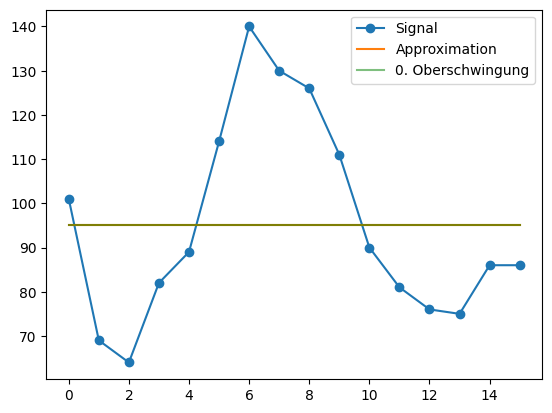

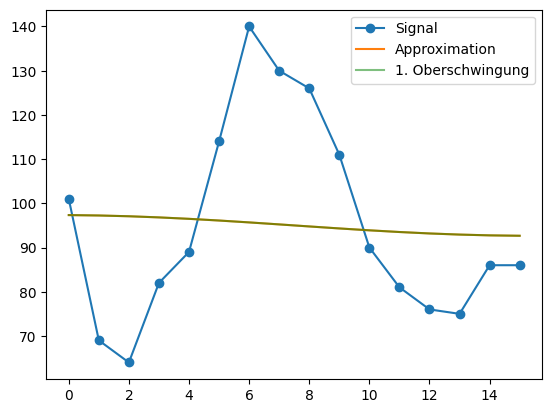

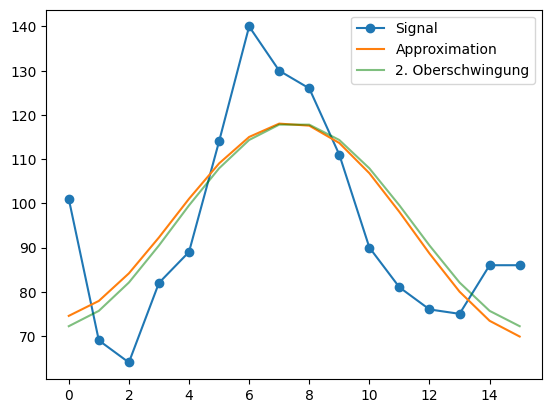

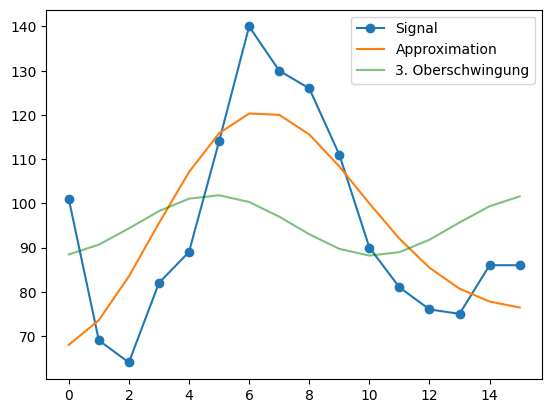

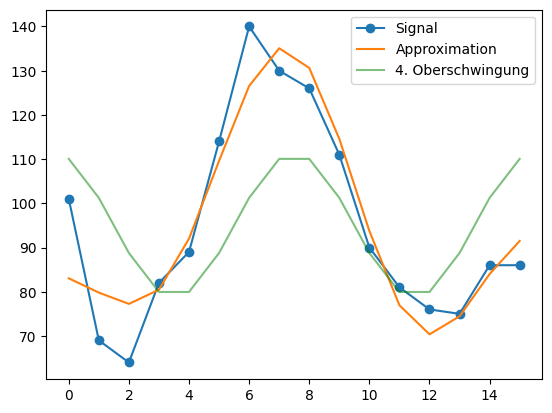

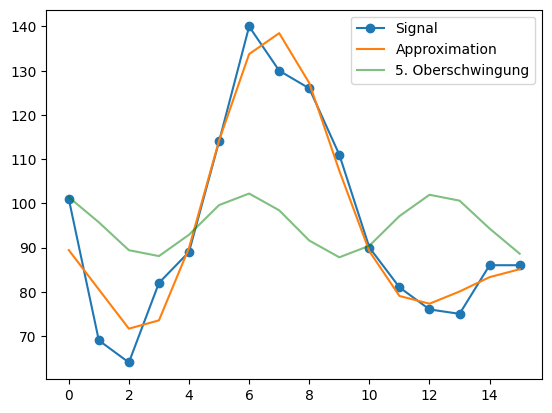

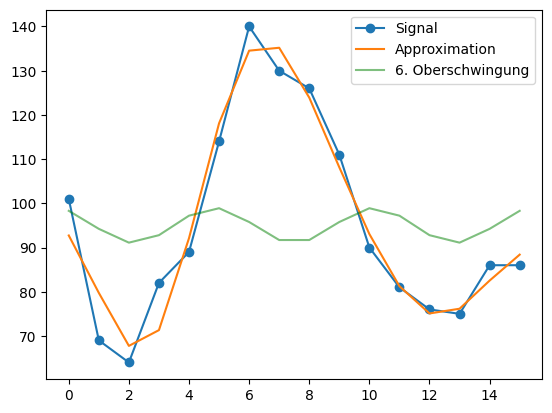

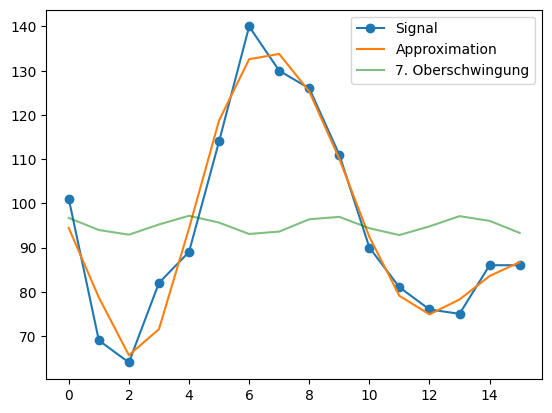

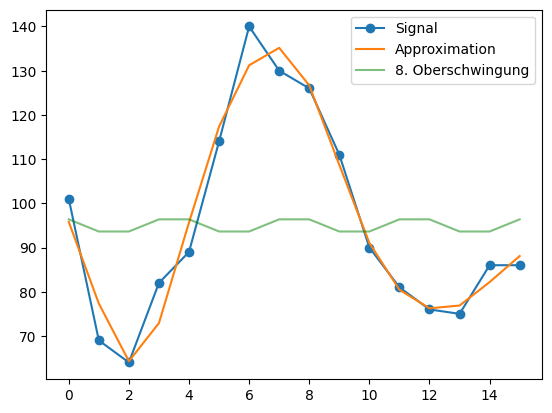

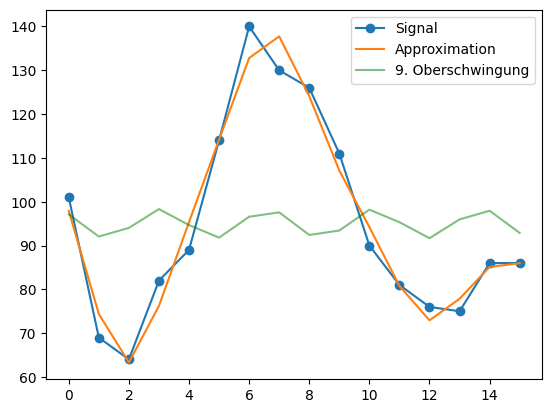

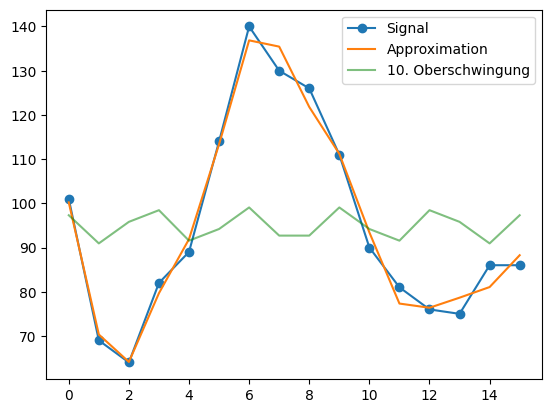

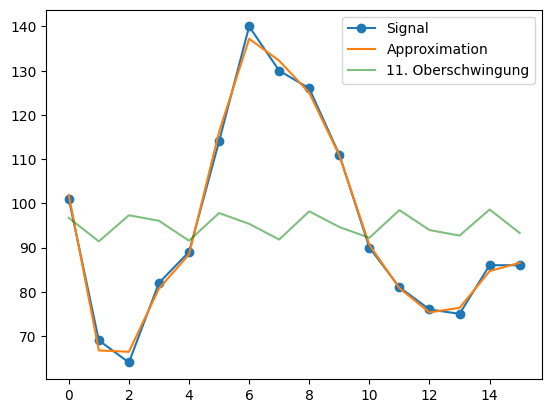

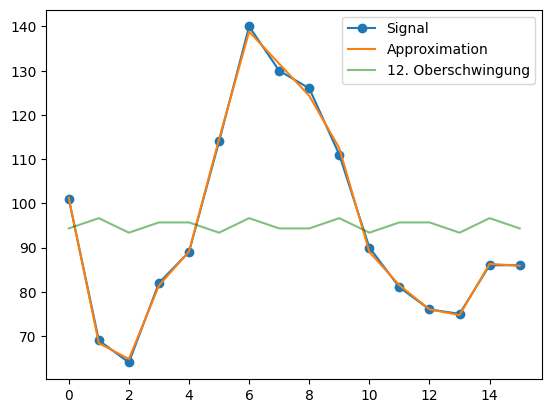

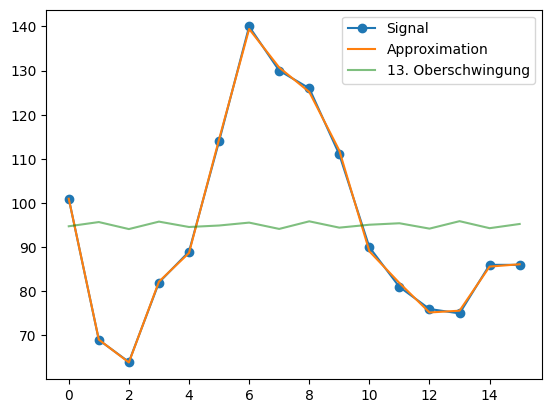

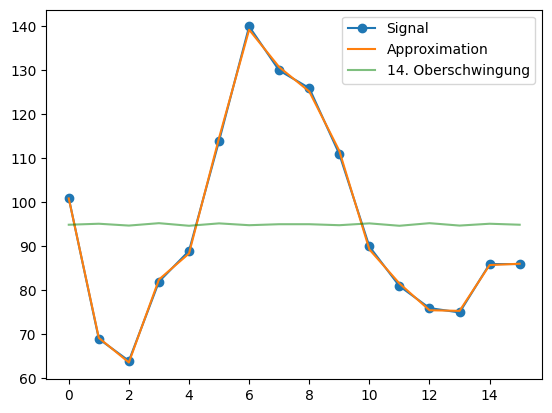

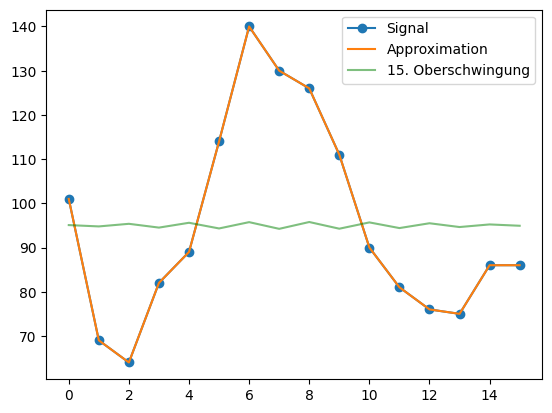

In [5]:
data = np.array([101,69,64,82,89,114,140,130,126,111,90,81,76,75,86,86])
plt.imshow(np.expand_dims(data, axis=0), 'gray', vmin=0, vmax=255)
plt.show()

# Test our own implementation
import dct.dct

dct_data = dct.dct.dct(data)
idct_data = dct.dct.idct(dct_data)

print(dct_data)
print(idct_data)
n = len(data)

for i in range(0,len(data)):
    plt.plot(data, '-o', label="Signal")

    # Get the approximation of the function up to this iteration i
    idct_data_step = dct.dct.idct(dct_data, max_steps=i+1)
    plt.plot(idct_data_step, '-', label="Approximation")
    
    # Get only the i'th harmonics
    idct_data_harmonic = dct.dct.idct(dct_data, min_step=i, max_steps=i+1)
    plt.plot(idct_data_harmonic, color='green', alpha=0.5, label=f"{i}. Oberschwingung")
    
    plt.legend(loc="upper right")

    plt.show()

Add quantization function to result:

DEBUG - 0:
DEBUG -     X_0 (tmp 0) = 101
DEBUG -     X_0 (tmp 1) = 170
DEBUG -     X_0 (tmp 2) = 234
DEBUG -     X_0 (tmp 3) = 316
DEBUG -     X_0 (tmp 4) = 405
DEBUG -     X_0 (tmp 5) = 519
DEBUG -     X_0 (tmp 6) = 659
DEBUG -     X_0 (tmp 7) = 789
DEBUG -     X_0 (tmp 8) = 915
DEBUG -     X_0 (tmp 9) = 1026
DEBUG -     X_0 (tmp 10) = 1116
DEBUG -     X_0 (tmp 11) = 1197
DEBUG -     X_0 (tmp 12) = 1273
DEBUG -     X_0 (tmp 13) = 1348
DEBUG -     X_0 (tmp 14) = 1434
DEBUG -     X_0 (tmp 15) = 1520
DEBUG -   X_0 = 380.0
DEBUG - 1:
DEBUG -     X_1 (tmp 0) = 100.51365739389189 |   x_i=101, Pi/16=0.19634954084936207, 0+1/2*1=0.5 | cos(0.09817477042468103) = 0.9951847266721969
DEBUG -     X_1 (tmp 1) = 166.5425405594143 |   x_i=69, Pi/16=0.19634954084936207, 1+1/2*1=1.5 | cos(0.2945243112740431) = 0.9569403357322088
DEBUG -     X_1 (tmp 2) = 222.98550147770902 |   x_i=64, Pi/16=0.19634954084936207, 2+1/2*1=2.5 | cos(0.4908738521234052) = 0.881921264348355
DEBUG -     X_1 (tmp 3) = 286.3723

data: [101  69  64  82  89 114 140 130 126 111  90  81  76  75  86  86]
dct_data: [380.           6.64528564 -65.742693   -19.39431095  46.08752382
  20.49658818  11.23421332   6.20074952   5.5          9.43444586
  11.72472653  10.2403252   -5.01897882  -2.54175555  -0.84944429
   2.19269461]
qdct_data: [368   0 -80 -32  32  16   0   0   0   0   0   0 -16 -16   0   0]
idct_data: [101.  69.  64.  82.  89. 114. 140. 130. 126. 111.  90.  81.  76.  75.
  86.  86.]
didct_data: [ 65.06718034  75.78824407  55.6189204   83.10316641  94.89934763
 112.45151008 143.03723294 128.56606307 127.49096938 107.10943248
  83.86464694  83.56118891  73.28541978  77.84163994  80.28837316
  80.02666448]


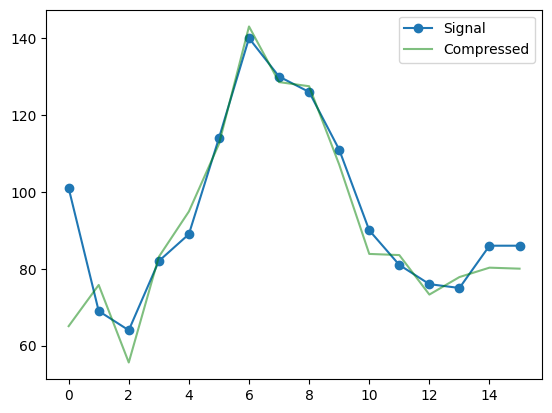

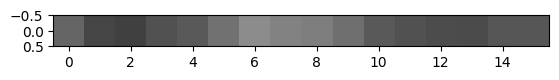

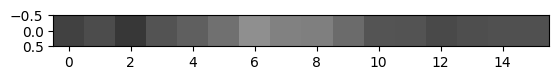

In [6]:
data = np.array([101,69,64,82,89,114,140,130,126,111,90,81,76,75,86,86])

import dct.dct
dct_data = dct.dct.dct(data)
qdct_data = dct.dct.quantizationBits(dct_data)
idct_data = dct.dct.idct(dct_data)
didct_data = dct.dct.idct(qdct_data)

print(f"data: {data}")
print(f"dct_data: {dct_data}")
print(f"qdct_data: {qdct_data}")
print(f"idct_data: {idct_data}")
print(f"didct_data: {didct_data}")

plt.plot(data, '-o', label="Signal")
plt.plot(didct_data, color='green', alpha=0.5, label=f"Compressed")

plt.legend(loc="upper right")

plt.show()

# "picture"
plt.imshow(np.expand_dims(data, axis=0), 'gray', vmin=0, vmax=255)
plt.show()
plt.imshow(np.expand_dims(didct_data, axis=0), 'gray', vmin=0, vmax=255)
plt.show()

With the `quantizationWeight` function:

DEBUG - 0:
DEBUG -     X_0 (tmp 0) = 101
DEBUG -     X_0 (tmp 1) = 170
DEBUG -     X_0 (tmp 2) = 234
DEBUG -     X_0 (tmp 3) = 316
DEBUG -     X_0 (tmp 4) = 405
DEBUG -     X_0 (tmp 5) = 519
DEBUG -     X_0 (tmp 6) = 659
DEBUG -     X_0 (tmp 7) = 789
DEBUG -     X_0 (tmp 8) = 915
DEBUG -     X_0 (tmp 9) = 1026
DEBUG -     X_0 (tmp 10) = 1116
DEBUG -     X_0 (tmp 11) = 1197
DEBUG -     X_0 (tmp 12) = 1273
DEBUG -     X_0 (tmp 13) = 1348
DEBUG -     X_0 (tmp 14) = 1434
DEBUG -     X_0 (tmp 15) = 1520
DEBUG -   X_0 = 380.0
DEBUG - 1:
DEBUG -     X_1 (tmp 0) = 100.51365739389189 |   x_i=101, Pi/16=0.19634954084936207, 0+1/2*1=0.5 | cos(0.09817477042468103) = 0.9951847266721969
DEBUG -     X_1 (tmp 1) = 166.5425405594143 |   x_i=69, Pi/16=0.19634954084936207, 1+1/2*1=1.5 | cos(0.2945243112740431) = 0.9569403357322088
DEBUG -     X_1 (tmp 2) = 222.98550147770902 |   x_i=64, Pi/16=0.19634954084936207, 2+1/2*1=2.5 | cos(0.4908738521234052) = 0.881921264348355
DEBUG -     X_1 (tmp 3) = 286.3723

data: [101  69  64  82  89 114 140 130 126 111  90  81  76  75  86  86]
dct_data: [380.           6.64528564 -65.742693   -19.39431095  46.08752382
  20.49658818  11.23421332   6.20074952   5.5          9.43444586
  11.72472653  10.2403252   -5.01897882  -2.54175555  -0.84944429
   2.19269461]
qdct_data: [126   2 -21  -4  11   4   2   1   0   1   1   1   0   0   0   0]
dqdct_data: [ 99.01451003  71.60624599  68.1526462   77.20167275  87.52962715
 115.38665974 134.03568315 129.46319527 122.95078724 110.83836881
  92.28801895  80.64179045  75.13813919  78.36004669  85.33233046
  84.06027791]
idct_data: [ 99.01451003  71.60624599  68.1526462   77.20167275  87.52962715
 115.38665974 134.03568315 129.46319527 122.95078724 110.83836881
  92.28801895  80.64179045  75.13813919  78.36004669  85.33233046
  84.06027791]
didct_data: [ 99.01451003  71.60624599  68.1526462   77.20167275  87.52962715
 115.38665974 134.03568315 129.46319527 122.95078724 110.83836881
  92.28801895  80.64179045  75.1381

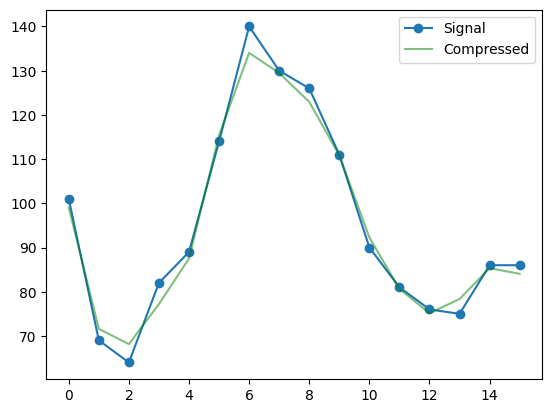

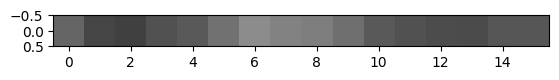

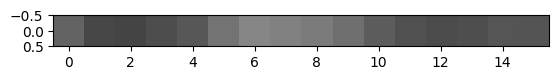

In [7]:
data = np.array([101,69,64,82,89,114,140,130,126,111,90,81,76,75,86,86])

import dct.dct
dct_data = dct.dct.dct(data)
qdct_data = dct.dct.quantizationWeight(dct_data)
dqdct_data = dct.dct.deQuantizationWeight(qdct_data)
idct_data = dct.dct.idct(dqdct_data)
didct_data = dct.dct.idct(dqdct_data)

print(f"data: {data}")
print(f"dct_data: {dct_data}")
print(f"qdct_data: {qdct_data}")
print(f"dqdct_data: {idct_data}")
print(f"idct_data: {idct_data}")
print(f"didct_data: {didct_data}")

plt.plot(data, '-o', label="Signal")
plt.plot(didct_data, color='green', alpha=0.5, label=f"Compressed")

plt.legend(loc="upper right")

plt.show()

# "picture"
plt.imshow(np.expand_dims(data, axis=0), 'gray', vmin=0, vmax=255)
plt.show()
plt.imshow(np.expand_dims(didct_data, axis=0), 'gray', vmin=0, vmax=255)
plt.show()

Excercise from the lecture:

DEBUG - 0:
DEBUG -     X_0 (tmp 0) = 20
DEBUG -     X_0 (tmp 1) = 40
DEBUG -     X_0 (tmp 2) = 60
DEBUG -     X_0 (tmp 3) = 80
DEBUG -     X_0 (tmp 4) = 110
DEBUG -     X_0 (tmp 5) = 210
DEBUG -     X_0 (tmp 6) = 380
DEBUG -     X_0 (tmp 7) = 560
DEBUG -     X_0 (tmp 8) = 740
DEBUG -     X_0 (tmp 9) = 915
DEBUG -     X_0 (tmp 10) = 1035
DEBUG -     X_0 (tmp 11) = 1090
DEBUG -     X_0 (tmp 12) = 1140
DEBUG -     X_0 (tmp 13) = 1190
DEBUG -     X_0 (tmp 14) = 1240
DEBUG -     X_0 (tmp 15) = 1290
DEBUG -   X_0 = 322.5
DEBUG - 1:
DEBUG -     X_1 (tmp 0) = 19.90369453344394 |   x_i=20, Pi/16=0.19634954084936207, 0+1/2*1=0.5 | cos(0.09817477042468103) = 0.9951847266721969
DEBUG -     X_1 (tmp 1) = 39.042501248088115 |   x_i=20, Pi/16=0.19634954084936207, 1+1/2*1=1.5 | cos(0.2945243112740431) = 0.9569403357322088
DEBUG -     X_1 (tmp 2) = 56.68092653505522 |   x_i=20, Pi/16=0.19634954084936207, 2+1/2*1=2.5 | cos(0.4908738521234052) = 0.881921264348355
DEBUG -     X_1 (tmp 3) = 72.141135602309

data: [ 20  20  20  20  30 100 170 180 180 175 120  55  50  50  50  50]
dct_data: [ 3.22500000e+02 -4.77123460e+01 -2.11900020e+02  3.28032412e+00
  1.06738582e+02  4.27576834e+00 -1.13225486e+01 -3.37870506e+00
 -3.00000000e+01  1.94846437e+00  2.36403447e+01 -1.43312355e+00
 -3.62286077e+00  1.80515383e-01 -4.88011228e+00  1.48011054e+00]
qdct_data: [ 320  -48 -224    0   96    0  -16  -16  -32    0   16  -16  -16    0
  -16    0]
idct_data: [ -3.07409963  31.12056407  14.59228006  25.43636044  33.88084288
  97.82093144 172.87391107 188.44544255 174.61711382 173.85763698
 125.8504784   55.84555084  56.06633882  40.87647705  47.00772093
  44.78245028]
didct_data: [ -3.07409963  31.12056407  14.59228006  25.43636044  33.88084288
  97.82093144 172.87391107 188.44544255 174.61711382 173.85763698
 125.8504784   55.84555084  56.06633882  40.87647705  47.00772093
  44.78245028]


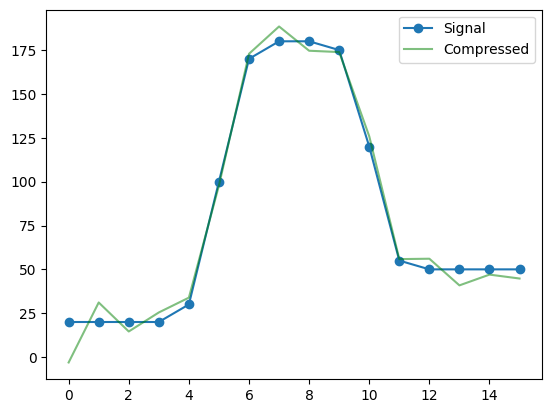

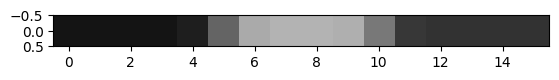

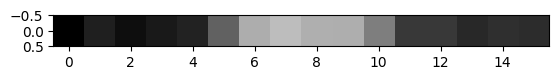

In [8]:
data = np.array([20,20,20,20,30,100,170,180,180,175,120,55,50,50,50,50])

import dct.dct
dct_data = dct.dct.dct(data)
qdct_data = dct.dct.quantizationBits(dct_data)
idct_data = dct.dct.idct(qdct_data)
didct_data = dct.dct.idct(qdct_data)

print(f"data: {data}")
print(f"dct_data: {dct_data}")
print(f"qdct_data: {qdct_data}")
print(f"idct_data: {idct_data}")
print(f"didct_data: {didct_data}")

plt.plot(data, '-o', label="Signal")
plt.plot(didct_data, color='green', alpha=0.5, label=f"Compressed")

plt.legend(loc="upper right")

plt.show()

# "picture"
plt.imshow(np.expand_dims(data, axis=0), 'gray', vmin=0, vmax=255)
plt.show()
plt.imshow(np.expand_dims(didct_data, axis=0), 'gray', vmin=0, vmax=255)
plt.show()

2nd exercise from the lecture:

DEBUG - 0:
DEBUG -     X_0 (tmp 0) = 100
DEBUG -     X_0 (tmp 1) = 210
DEBUG -     X_0 (tmp 2) = 340
DEBUG -     X_0 (tmp 3) = 500
DEBUG -     X_0 (tmp 4) = 630
DEBUG -     X_0 (tmp 5) = 740
DEBUG -     X_0 (tmp 6) = 840
DEBUG -   X_0 = 317.49015732775086
DEBUG - 1:
DEBUG -     X_1 (tmp 0) = 97.49279121818236 |   x_i=100, Pi/7=0.4487989505128276, 0+1/2*1=0.5 | cos(0.2243994752564138) = 0.9749279121818236
DEBUG -     X_1 (tmp 1) = 183.49425428966563 |   x_i=110, Pi/7=0.4487989505128276, 1+1/2*1=1.5 | cos(0.6731984257692414) = 0.7818314824680298
DEBUG -     X_1 (tmp 2) = 239.8991403749482 |   x_i=130, Pi/7=0.4487989505128276, 2+1/2*1=2.5 | cos(1.121997376282069) = 0.4338837391175582
DEBUG -     X_1 (tmp 3) = 239.8991403749482 |   x_i=160, Pi/7=0.4487989505128276, 3+1/2*1=3.5 | cos(1.5707963267948966) = 6.123233995736766e-17
DEBUG -     X_1 (tmp 4) = 183.49425428966563 |   x_i=130, Pi/7=0.4487989505128276, 4+1/2*1=4.5 | cos(2.019595277307724) = -0.43388373911755806
DEBUG -     X_1 (tmp 5)

data: [100 110 130 160 130 110 100]
dct_data: [ 3.17490157e+02  0.00000000e+00 -4.96886592e+01  1.51920427e-14
  1.53030401e+01  2.65860748e-14 -9.84144835e+00]
qdct_data: [304   0 -64   0   0   0 -16]
idct_data: [ 82.17648122 112.62119257 128.52502624 157.6629985  128.52502624
 112.62119257  82.17648122]
didct_data: [ 82.17648122 112.62119257 128.52502624 157.6629985  128.52502624
 112.62119257  82.17648122]


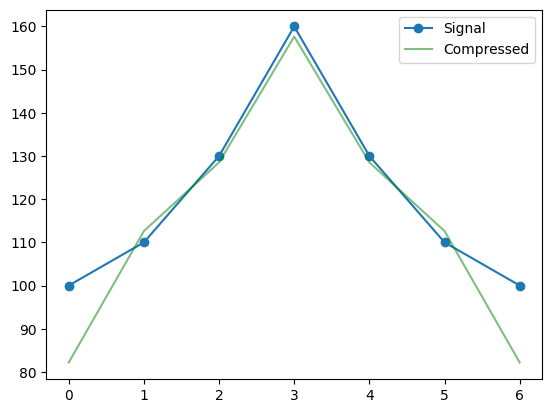

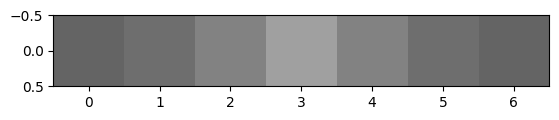

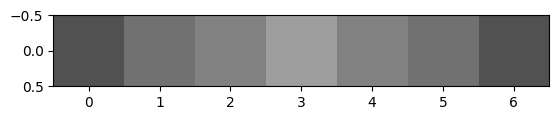

In [9]:
data = np.array([100,110,130,160,130,110,100])

import dct.dct
dct_data = dct.dct.dct(data)
qdct_data = dct.dct.quantizationBits(dct_data)
idct_data = dct.dct.idct(qdct_data)
didct_data = dct.dct.idct(qdct_data)

print(f"data: {data}")
print(f"dct_data: {dct_data}")
print(f"qdct_data: {qdct_data}")
print(f"idct_data: {idct_data}")
print(f"didct_data: {didct_data}")

plt.plot(data, '-o', label="Signal")
plt.plot(didct_data, color='green', alpha=0.5, label=f"Compressed")

plt.legend(loc="upper right")

plt.show()

# "picture"
plt.imshow(np.expand_dims(data, axis=0), 'gray', vmin=0, vmax=255)
plt.show()
plt.imshow(np.expand_dims(didct_data, axis=0), 'gray', vmin=0, vmax=255)
plt.show()